<a href="https://colab.research.google.com/github/manuelnut/10725644-GaussianFilter/blob/main/gaussian-filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian Filter

In [22]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

In [50]:
# Cross-correlation
def convolution(image, kernel):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    plt.imshow(image, cmap='gray')
    plt.title("Image")
    plt.show()

    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape

    output = np.zeros(image.shape)

    # pad the image
    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)
    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))
    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image

    # applying kernel to padded image
    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])

    # Display final image
    plt.imshow(output, cmap='gray')
    plt.show()

In [51]:
# `dnorm` returns the density
def dnorm(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)

In [52]:
# `gaussian_kernel` takes params kernel size and standard deviation (sigma)
# and returns a kernel used for filtering.
def gaussian_kernel(size, sigma=1):
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel_1D[i] = dnorm(kernel_1D[i], 0, sigma)
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)
    kernel_2D *= 1.0 / kernel_2D.max()
    return kernel_2D

In [53]:
def gaussian_blur(image, kernel_size):
    kernel = gaussian_kernel(kernel_size, sigma=math.sqrt(kernel_size))
    convolution(image, kernel)

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

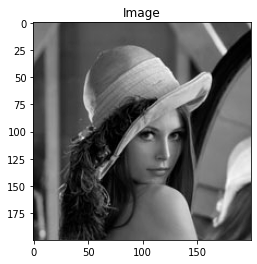

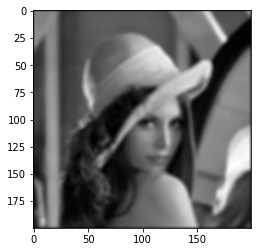

In [55]:
gaussian_blur(cv2.imread("/gdrive/My Drive/image.jpg", 0), 5)

Reference: http://www.adeveloperdiary.com/data-science/computer-vision/applying-gaussian-smoothing-to-an-image-using-python-from-scratch/